# NYPD Complaint Data Historic - Criminal analysis


## Part1 Drug activity in NYC overall

### Technical Requirements:

download and install needed libraries for this notebook:

-pandas

-requests

-io

-urllib.parse

-sklearn

-matplotlib

-seaborn

-folium

-Create a data directory in the path where this notebook is executed

API configuration, to download the dataset

In [64]:
api_key = 'mdeqlkih5n1165zrzr12ef7h'
api_secret = '2i226o40eck9h9cbfp3gus6mvdc72bt5u22bf16cybje5a1071'
output_file = "data/full_drug_crime.csv"

Once our API credentials are set, let's actually download the data (it might take a while).

We already filter out the data, by retrieving only values related to Drug sales and drug possesion crimes.

In [65]:
import pandas as pd
import requests
import numpy as np
from io import StringIO
from requests.auth import HTTPBasicAuth
from urllib.parse import quote

limit = 50000
offset = 0

filters = quote("""
$where=pd_desc like '%CONTROLLED%SUBSTANCE%SALE%' OR OFNS_DESC like '%DRUG%'
""".strip(), safe=':/?&=')
print("Filters:", filters)

df = pd.DataFrame()
while True:
    url = f"""
    https://data.cityofnewyork.us/resource/qgea-i56i.csv?{filters}&$limit={limit}&$offset={offset}
    """.strip()
    response = requests.get(url, auth=HTTPBasicAuth(api_key, api_secret))

    if response.status_code == 200:
        csv_data = StringIO(response.text)
        df_temp = pd.read_csv(csv_data)

        if not df_temp.empty:
            df = pd.concat([df, df_temp], ignore_index=True)
            offset += limit
        else:
            break
    else:
        raise Exception(f"Failed to retrieve data. Status code: {response.status_code}", response.json())

df.to_csv(output_file, index=False)
print("Data retrieval complete")
print(f"Total records retrieved: {len(df)}")

Filters: %24where=pd_desc%20like%20%27%25CONTROLLED%25SUBSTANCE%25SALE%25%27%20OR%20OFNS_DESC%20like%20%27%25DRUG%25%27
Data retrieval complete
Total records retrieved: 456576


Let's see how the data looks like and try to convert it into csv format:

In [66]:
df = pd.read_csv(output_file)

Quick check on columns:

In [67]:
print("Cols", df.columns)
len(df)

Cols Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt',
       'cmplnt_to_tm', 'addr_pct_cd', 'rpt_dt', 'ky_cd', 'ofns_desc', 'pd_cd',
       'pd_desc', 'crm_atpt_cptd_cd', 'law_cat_cd', 'boro_nm',
       'loc_of_occur_desc', 'prem_typ_desc', 'juris_desc', 'jurisdiction_code',
       'parks_nm', 'hadevelopt', 'housing_psa', 'x_coord_cd', 'y_coord_cd',
       'susp_age_group', 'susp_race', 'susp_sex', 'transit_district',
       'latitude', 'longitude', 'lat_lon', 'patrol_boro', 'station_name',
       'vic_age_group', 'vic_race', 'vic_sex'],
      dtype='object')


456576

Let's verify how many null values have we got per column.

In [68]:
print(df.isnull().sum())

cmplnt_num                0
cmplnt_fr_dt              3
cmplnt_fr_tm              0
cmplnt_to_dt         131592
cmplnt_to_tm              0
addr_pct_cd               1
rpt_dt                    0
ky_cd                     0
ofns_desc                 0
pd_cd                     0
pd_desc                   0
crm_atpt_cptd_cd          0
law_cat_cd                0
boro_nm                   0
loc_of_occur_desc        14
prem_typ_desc             0
juris_desc                0
jurisdiction_code         0
parks_nm                  0
hadevelopt                0
housing_psa               0
x_coord_cd                1
y_coord_cd                1
susp_age_group            0
susp_race                 0
susp_sex                  0
transit_district     447067
latitude                  1
longitude                 1
lat_lon                   1
patrol_boro               0
station_name              0
vic_age_group             0
vic_race                  0
vic_sex                   0
dtype: int64


Seems to good to be true, based on our .head() results, we can see that there are "(null)" values, which do not classify as null type, but as a string type. Let's replace those:

In [69]:
df.replace("(null)", np.nan, inplace=True)

And see the results again:

In [70]:
print(df.isnull().sum())

cmplnt_num                0
cmplnt_fr_dt              3
cmplnt_fr_tm              1
cmplnt_to_dt         131592
cmplnt_to_tm         131466
addr_pct_cd               1
rpt_dt                    0
ky_cd                     0
ofns_desc                 0
pd_cd                     0
pd_desc                   0
crm_atpt_cptd_cd          0
law_cat_cd                0
boro_nm                 368
loc_of_occur_desc    193636
prem_typ_desc          4535
juris_desc                0
jurisdiction_code         0
parks_nm             452180
hadevelopt           453335
housing_psa          378479
x_coord_cd                1
y_coord_cd                1
susp_age_group       342873
susp_race            342103
susp_sex             342173
transit_district     447067
latitude                  1
longitude                 1
lat_lon                   1
patrol_boro               2
station_name         447067
vic_age_group        337370
vic_race                 63
vic_sex                  63
dtype: int64


In [71]:
df_percent = df.isnull().sum() / len(df) * 100
print("Percentage of missing values in our filtered dataframe:")
print(df_percent)

Percentage of missing values in our filtered dataframe:
cmplnt_num            0.000000
cmplnt_fr_dt          0.000657
cmplnt_fr_tm          0.000219
cmplnt_to_dt         28.821489
cmplnt_to_tm         28.793892
addr_pct_cd           0.000219
rpt_dt                0.000000
ky_cd                 0.000000
ofns_desc             0.000000
pd_cd                 0.000000
pd_desc               0.000000
crm_atpt_cptd_cd      0.000000
law_cat_cd            0.000000
boro_nm               0.080600
loc_of_occur_desc    42.410464
prem_typ_desc         0.993263
juris_desc            0.000000
jurisdiction_code     0.000000
parks_nm             99.037181
hadevelopt           99.290151
housing_psa          82.895071
x_coord_cd            0.000219
y_coord_cd            0.000219
susp_age_group       75.096589
susp_race            74.927942
susp_sex             74.943273
transit_district     97.917324
latitude              0.000219
longitude             0.000219
lat_lon               0.000219
patrol_boro   

Much better. So we already know that using such values as:

-parks_nm

-hadevelopt

-housing_psa

-transit_district

-station_name

is definitely not a good idea. We will not even considerate taking them into account.

Let's take look at all provided columns, we will carefully analyse which of them are valuable for us, and which types of data we can easily get rid of.

In [72]:
print(df.columns)

Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt',
       'cmplnt_to_tm', 'addr_pct_cd', 'rpt_dt', 'ky_cd', 'ofns_desc', 'pd_cd',
       'pd_desc', 'crm_atpt_cptd_cd', 'law_cat_cd', 'boro_nm',
       'loc_of_occur_desc', 'prem_typ_desc', 'juris_desc', 'jurisdiction_code',
       'parks_nm', 'hadevelopt', 'housing_psa', 'x_coord_cd', 'y_coord_cd',
       'susp_age_group', 'susp_race', 'susp_sex', 'transit_district',
       'latitude', 'longitude', 'lat_lon', 'patrol_boro', 'station_name',
       'vic_age_group', 'vic_race', 'vic_sex'],
      dtype='object')
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   4.7s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   7.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=  11.2s


We will only need specific columns for our case study:

-cmplnt_num - id of the complaint, we do not use that value.

-cmplnt_fr_dt -> we will use that, to see changes within the last years, to see how the Drug Sales criminal activity trends are evolving.

-cmplnt_fr_tm -> we will compare the drug activity and it's correlation with the time of the day.

-cmplnt_to_dt & cmplnt_to_tm - date and time of the end of the incident. We won't be needing those values.

-addr_pct_cd - the precidnt in which the incident occured. We won't be using this value, our location analysis will be based on coordinates.

-rpt_dt - no use for our case scenario.

-ky_cd - Three digit offense classification code. Not needed for drug sales activity.

-ofns_desc - description of the offense. We already filtered our data to Drug Sales activity, so it's not necessary for us to keep those values.

-pd_cd - Three digit internal classification code (more granular than Key Code), same conclusion as for ky_cd.

-pd_desc - ofns_desc value is enough for us, we already have the 'type' of the crime we are interested in.

-crm_atpt_ctpd_cd -> Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely. 
???
Might be useful for us

-law_cat_cd - Level of offense: felony, misdemeanor, violation - we don't need to check on that. Won't be using this value.

-boro_nm -> The name of the borough in which the incident occurred. Easier to group by, so we will use it.

-loc_of_occur_desc -> Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of - this will help us in many cases, to define where exactly the drug sale occured.

-prem_typ_desc -> Specific description of premises; grocery store, residence, street, etc. Very useful for us to come up with some conclusions based on location type.

-juris_desc - Description of the jurisdiction code - not so useful for our case, won't be using this value.

-jurisdiction_code - Jurisdiction responsible for incident. Either internal, like Police(0), Transit(1), and Housing(2); or external(3), like Correction, Port Authority, etc. - same conclusion as for juris_desc.

-x_coord_cd & y_coord_cd  -> We can create a heatmap, to visualise locations which are most common with women's criminal records.

-susp_age_group & susp_race & susp_sex -> we might use that in case we would like to continue to investigate the social and environmental conditions/reasons but  this data isn't that descriptive.

-latitude and longitude and lat_lon - we already use the x and y coordinates

-patrol_boro - The name of the patrol borough in which the incident occurred - this value is not within our interest.

-vic_age group and vic_race and vic_sex - we don't really see any point of keeping that - no victims within the crimes we investigate.

So now let's continue with updating our sub dataframe, specifically for analyzing the correlation between 'Drug sales' : 'time of the day' + 'locations' visualisation.

In [73]:
columns_of_interest = [
    'cmplnt_fr_dt', 'cmplnt_fr_tm', 'boro_nm', 'crm_atpt_cptd_cd', 'loc_of_occur_desc', 'prem_typ_desc', 'x_coord_cd',
    'y_coord_cd', 'susp_age_group', 'susp_race', 'susp_sex', 'pd_desc'
]
existing_columns = [col for col in columns_of_interest if col in df.columns]

df.loc[:, existing_columns] = df.loc[:, existing_columns].replace("(null)", np.nan)
df_drugs_time = df[existing_columns]
df_drugs_time.head(100)

[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   9.4s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   5.3s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   8.6s


,cmplnt_fr_dt,cmplnt_fr_tm,boro_nm,crm_atpt_cptd_cd,loc_of_occur_desc,prem_typ_desc,x_coord_cd,y_coord_cd,susp_age_group,susp_race,susp_sex,pd_desc
0,2023-12-31T00:00:00.000,18:00:00,BROOKLYN,COMPLETED,INSIDE,RESIDENCE - APT. HOUSE,1001709.0,186644.0,25-44,BLACK,M,"CONTROLLED SUBSTANCE,INTENT TO"
1,2023-12-31T00:00:00.000,11:50:00,BROOKLYN,COMPLETED,NaN,STREET,979451.0,159745.0,25-44,BLACK,M,"CONTROLLED SUBSTANCE, POSSESSI"
2,2023-12-31T00:00:00.000,01:01:00,BROOKLYN,COMPLETED,NaN,TRANSIT - NYC SUBWAY,990141.0,188391.0,45-64,WHITE HISPANIC,M,"CONTROLLED SUBSTANCE, POSSESSI"
3,2023-12-31T00:00:00.000,20:45:00,QUEENS,COMPLETED,NaN,STREET,1039726.0,195270.0,45-64,BLACK,M,"CONTROLLED SUBSTANCE, POSSESSI"
4,2023-12-31T00:00:00.000,00:00:00,QUEENS,COMPLETED,INSIDE,STREET,1041879.0,197083.0,25-44,BLACK,F,"CONTROLLED SUBSTANCE,INTENT TO"
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023-12-27T00:00:00.000,22:09:00,BROOKLYN,COMPLETED,NaN,TRANSIT - NYC SUBWAY,995908.0,183618.0,25-44,WHITE,M,"CONTROLLED SUBSTANCE, POSSESSI"
96,2023-12-27T00:00:00.000,13:05:00,STATEN ISLAND,COMPLETED,NaN,STREET,961742.0,172428.0,25-44,BLACK,M,"CONTROLLED SUBSTANCE,INTENT TO"
97,2023-12-27T00:00:00.000,18:35:00,STATEN ISLAND,COMPLETED,FRONT OF,STREET,962758.0,172338.0,25-44,WHITE,F,"CONTROLLED SUBSTANCE, POSSESSI"
98,2023-12-27T00:00:00.000,01:03:00,MANHATTAN,COMPLETED,NaN,STREET,1002824.0,249147.0,45-64,BLACK HISPANIC,M,"CONTROLLED SUBSTANCE,POSSESS."


As we already know which data is crucial, let's take another look at our values, and see how many empty/null records we've got, and how crucial from this point are those values for us.

In [74]:
df_percent = df_drugs_time.isnull().sum() / len(df) * 100
print("Percentage of missing values in our filtered dataframe:")
print(df_percent)
print(len(df_drugs_time))

Percentage of missing values in our filtered dataframe:
cmplnt_fr_dt          0.000657
cmplnt_fr_tm          0.000219
boro_nm               0.080600
crm_atpt_cptd_cd      0.000000
loc_of_occur_desc    42.410464
prem_typ_desc         0.993263
x_coord_cd            0.000219
y_coord_cd            0.000219
susp_age_group       75.096589
susp_race            74.927942
susp_sex             74.943273
pd_desc               0.000000
dtype: float64
456576


Now let's take a closer look at the locations, so where exactly are the drug sales conducted?

In [75]:
df_count_loc = df_drugs_time['prem_typ_desc'].value_counts().reset_index()
df_count_loc.columns = ['prem_typ_desc', 'count']
print(df_count_loc.head(15))

[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   7.1s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=200; total time=  16.2s
                  prem_typ_desc   count
0                        STREET  271274
1    RESIDENCE - PUBLIC HOUSING   75596
2        RESIDENCE - APT. HOUSE   36177
3               PARK/PLAYGROUND   18712
4                         OTHER   11986
5          TRANSIT - NYC SUBWAY    9302
6               RESIDENCE-HOUSE    5601
7               PUBLIC BUILDING    4421
8                GROCERY/BODEGA    2293
9   PARKING LOT/GARAGE (PUBLIC)    1928
10               BAR/NIGHT CLUB    1485
11                PUBLIC SCHOOL     895
12       OPEN AREAS (OPEN LOTS)     851
13                     HOSPITAL     761
14          COMMERCIAL BUILDING     756


Let's see those results on a graph.

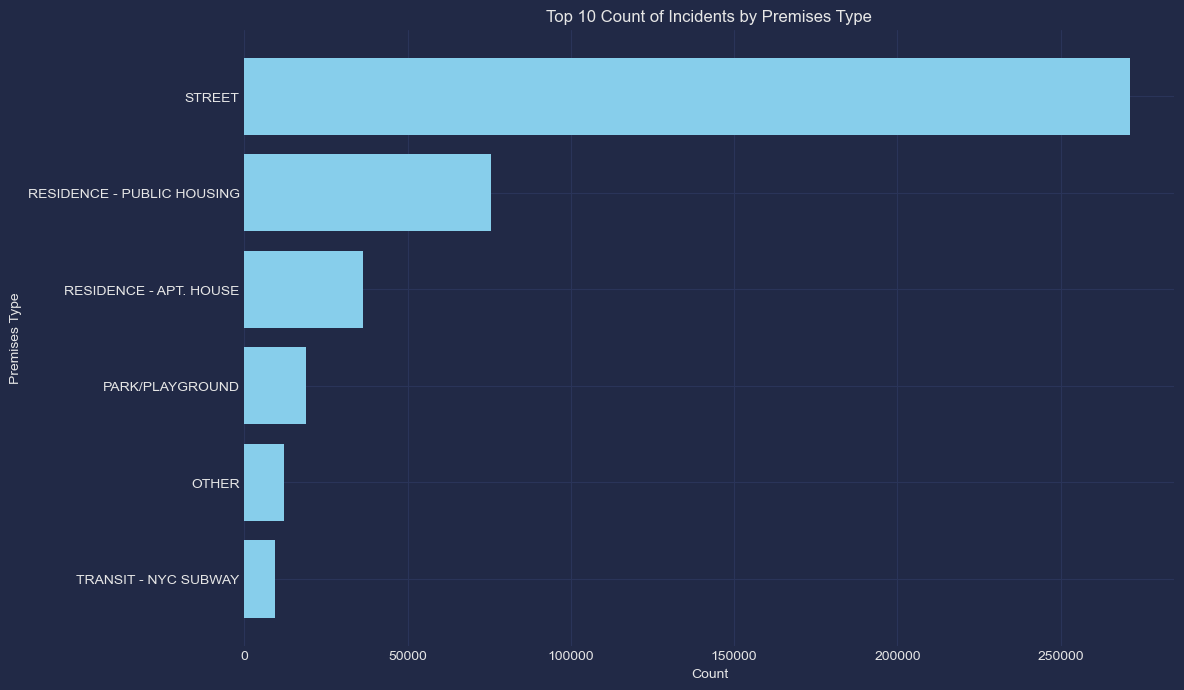

In [76]:
import matplotlib.pyplot as plt

df_count_loc = df_drugs_time['prem_typ_desc'].value_counts().reset_index()
df_count_loc.columns = ['prem_typ_desc', 'count']

df_count_loc_top10 = df_count_loc.head(6)

plt.figure(figsize=(12, 8))
plt.barh(df_count_loc_top10['prem_typ_desc'], df_count_loc_top10['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Premises Type')
plt.title('Top 10 Count of Incidents by Premises Type')
plt.gca().invert_yaxis()
plt.show()

It comes as no suprise, that most records occured on the 'Street' and in all sorts of flats/residencies/houses.

This was quite expected, but we are more interested in the public places. 

Now let's see how it looks like with the time of the day, we will extract the Hour value from the complaint time.

Then we group our data by Hour, to see whether there are any time data trends 

In [77]:
df_drugs_time['cmplnt_fr_tm'] = pd.to_datetime(df_drugs_time['cmplnt_fr_tm'], errors='coerce')

[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   7.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   5.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=  11.2s


/var/folders/wc/n17tc0jd6058m722n3d1wlc00000gn/T/ipykernel_93413/2121376814.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_drugs_time['cmplnt_fr_tm'] = pd.to_datetime(df_drugs_time['cmplnt_fr_tm'], errors='coerce')
/var/folders/wc/n17tc0jd6058m722n3d1wlc00000gn/T/ipykernel_93413/2121376814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drugs_time['cmplnt_fr_tm'] = pd.to_datetime(df_drugs_time['cmplnt_fr_tm'], errors='coerce')


We need to make sure to filter out rows where the Date value could not be converted to datetime type.

Then we extract the Hour value from the Time, and proceed with grouping and showing the plot for each hour of the day.

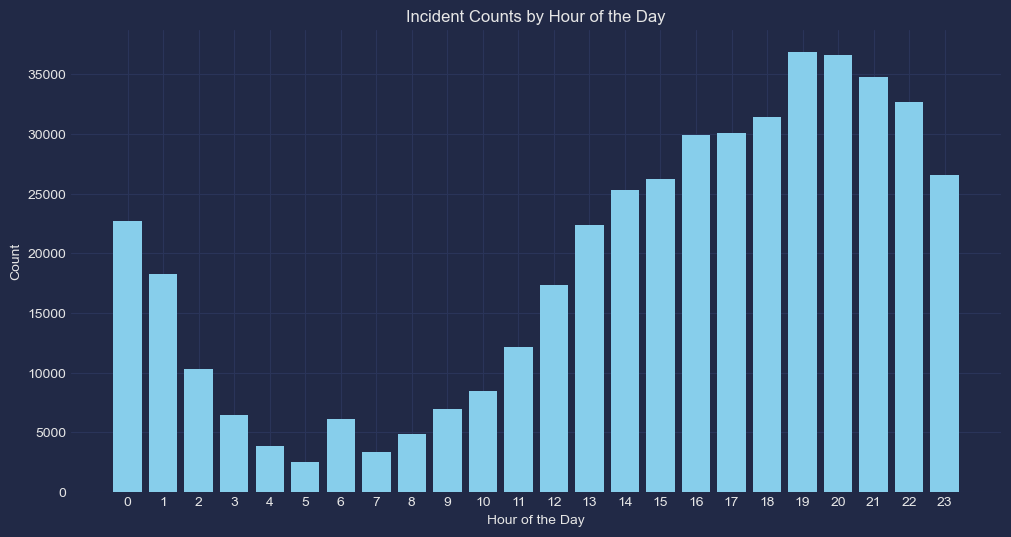

In [78]:
df_drugs_time = df_drugs_time.dropna(subset=['cmplnt_fr_tm'])

df_drugs_time['hour'] = df_drugs_time['cmplnt_fr_tm'].dt.hour

df_grouped = df_drugs_time.groupby(['hour']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.bar(df_grouped['hour'], df_grouped['count'], color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Incident Counts by Hour of the Day')
plt.xticks(df_grouped['hour'])
plt.show()

Late evening and early morning hours are critical times for drug-related activities, implying the need for enhanced surveillance and patrolling during these hours.

We were quite suprised to see the more activity within afternoon hours then comparing to night time.

But overall, if we evaluate those values, it's quite expected. 

The 6 am spike could be suprising, we can only assume that it might be a similar case to Polands alcohol activity. That would mean people completing such transactions before and after work, but we won't go any deeper that this, as we are more willing to analyse how the trend changed over they years.

Now we will focus on yearly trends and how the situation evolves for all sorts of drug activity since the beggining of 21st century

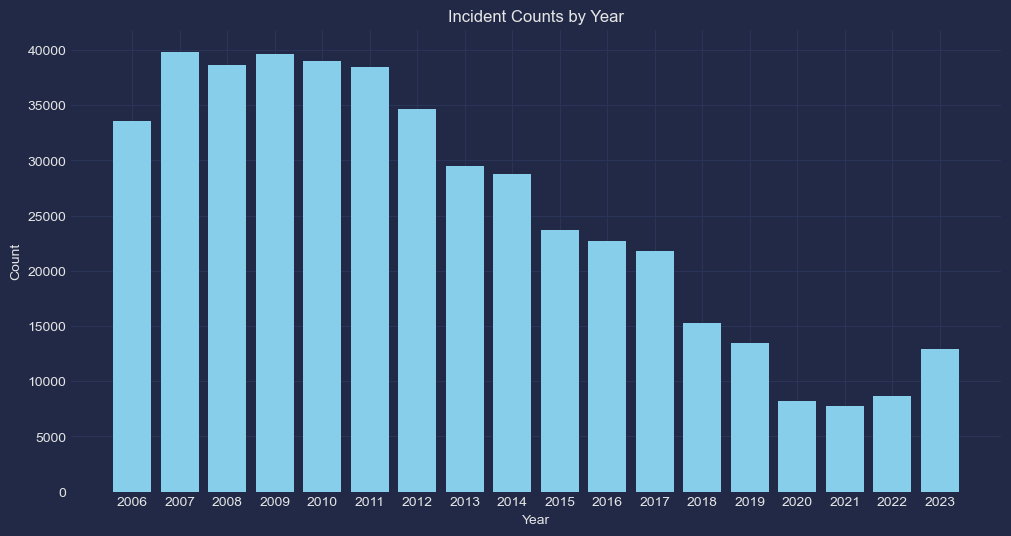

In [79]:
df_drugs_time['cmplnt_fr_dt'] = pd.to_datetime(df_drugs_time['cmplnt_fr_dt'], errors='coerce')

df_drugs_time = df_drugs_time[df_drugs_time['cmplnt_fr_dt'].dt.year >= 2006]

non_datetime_values = df_drugs_time[df_drugs_time['cmplnt_fr_dt'].isna()]

df_drugs_time['year'] = df_drugs_time['cmplnt_fr_dt'].dt.year

df_grouped = df_drugs_time.groupby(['year']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.bar(df_grouped['year'], df_grouped['count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Incident Counts by Year')
plt.xticks(df_grouped['year'])
plt.show()

That's very suprising, our idea was that the criminality related to drugs is on the rise, even though 2023 is a bith higher then recent years, but that's still nothing compared to early 2000s.

We are aware of current drug crisis in USA, we can only assume how present it is in NYC, so that could explain the 2023 increase.
The record stats are confirmed by a lot of media reports, here is the abcnews report:
https://abcnews.go.com/Health/overdose-crisis-reaches-historic-levels-new-york-city/story?id=103470582
which is based on https://www.cdc.gov/nchs/nvss/vsrr/drug-overdose-data.htm

But still, going further, the difference within last years is quite astonishing.
So even with current outbreak, we can farely say that the overall drug usage has sinificantly decreased, as we know that most of this data is related to Drug possesion:

Last point within our analysis is the location trend.

We wanted to find out, which public places are getting less and which more safe.

That doesn't fully depend on drug crimes of course, but we are aware that a lot of our records (specifically within the drug possesion) are related to public drug consumption. So we can fairly say that it says a lot about NYC security in such locations.

We exclude any sort of 'housing' locations, which indicate that it's more of a private location. This also depends on the 'loc_of_occur_desc' (whether it's 'INSIDE' or 'OPPOSITE') but we want to focus specificually on well known public areas.

In [80]:
df_drugs_time['cmplnt_fr_dt'] = pd.to_datetime(df_drugs_time['cmplnt_fr_dt'], errors='coerce')

df_drugs_time = df_drugs_time[df_drugs_time['cmplnt_fr_dt'].dt.year >= 2006]

non_datetime_values = df_drugs_time[df_drugs_time['cmplnt_fr_dt'].isna()]

df_drugs_time['year'] = df_drugs_time['cmplnt_fr_dt'].dt.year

df_filtered = df_drugs_time[~df_drugs_time['prem_typ_desc'].str.contains('STREET|Residence', case=False, na=False)]

In [123]:
df_drugs_time['cmplnt_fr_dt'] = pd.to_datetime(df_drugs_time['cmplnt_fr_dt'], errors='coerce')
df_drugs_time = df_drugs_time[df_drugs_time['cmplnt_fr_dt'].dt.year >= 2006]

Data cleaninig continues:
-remove non date type values
-extact year from the date
-exclude Street and private 'Housing' values

In [82]:
non_datetime_values = df_drugs_time[df_drugs_time['cmplnt_fr_dt'].isna()]
print("Non-datetime values in 'cmplnt_fr_dt':")
print(non_datetime_values[['cmplnt_fr_dt']])

df_drugs_time['year'] = df_drugs_time['cmplnt_fr_dt'].dt.year

df_filtered = df_drugs_time[~df_drugs_time['prem_typ_desc'].str.contains('STREET|Residence', case=False, na=False)]

Non-datetime values in 'cmplnt_fr_dt':
Empty DataFrame
Columns: [cmplnt_fr_dt]
Index: []


Now we group our dataframe by year and location, count how many records for each:

Top 15 locations for 2006:
    year                 prem_typ_desc  count
36  2006               PARK/PLAYGROUND   1001
35  2006                         OTHER    693
52  2006          TRANSIT - NYC SUBWAY    420
40  2006               PUBLIC BUILDING    305
28  2006                GROCERY/BODEGA    124
41  2006                 PUBLIC SCHOOL     98
38  2006   PARKING LOT/GARAGE (PUBLIC)     80
4   2006                BAR/NIGHT CLUB     64
31  2006                      HOSPITAL     52
17  2006           COMMERCIAL BUILDING     48
10  2006                  BUS TERMINAL     47
37  2006  PARKING LOT/GARAGE (PRIVATE)     44
34  2006        OPEN AREAS (OPEN LOTS)     40
54  2006                        TUNNEL     37
24  2006                     FAST FOOD     31


Top 15 locations for 2007:
     year                 prem_typ_desc  count
97   2007               PARK/PLAYGROUND   1126
95   2007                         OTHER    904
114  2007          TRANSIT - NYC SUBWAY    589
101  2007           

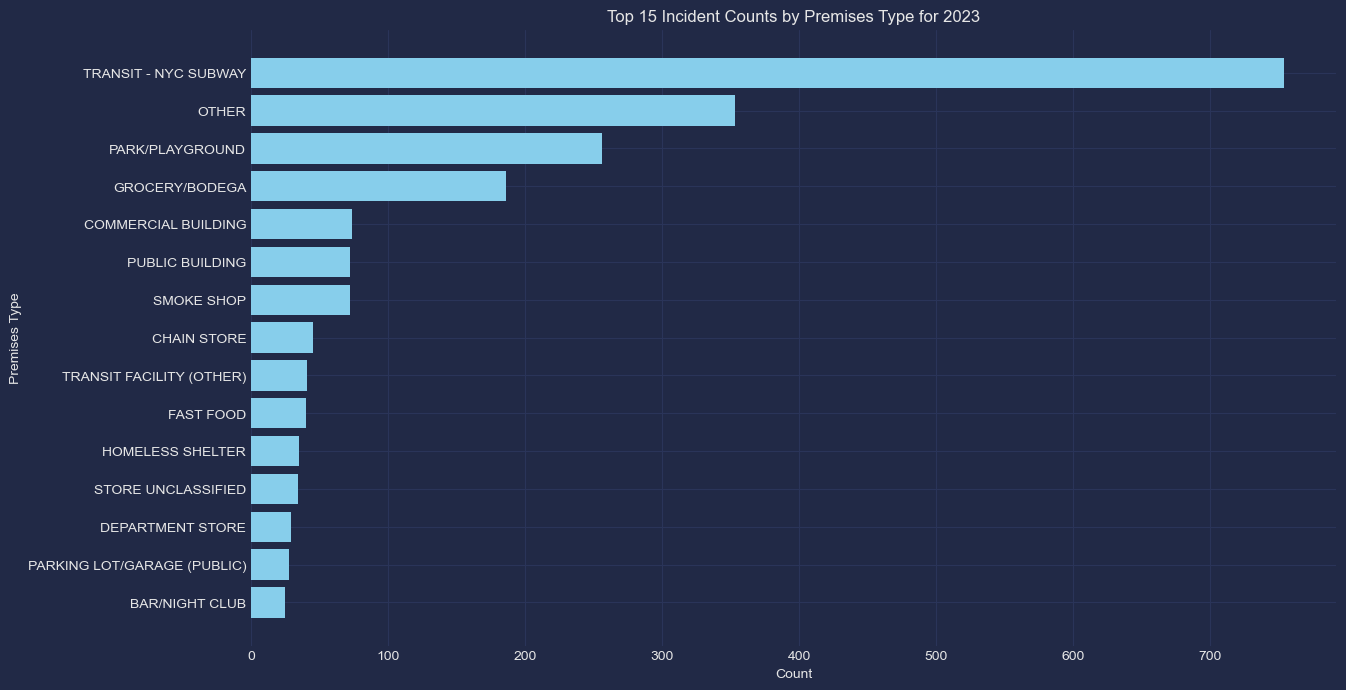

In [83]:
df_grouped = df_filtered.groupby(['year', 'prem_typ_desc']).size().reset_index(name='count')

top_locations_by_year = {}

for year in df_grouped['year'].unique():
    df_year = df_grouped[df_grouped['year'] == year]
    top_15 = df_year.nlargest(15, 'count')
    top_locations_by_year[year] = top_15

for year, data in top_locations_by_year.items():
    print(f"Top 15 locations for {year}:")
    print(data)
    print("\n")


df_top_locations = pd.concat(top_locations_by_year.values())

df_top_locations['count_diff'] = df_top_locations.groupby('prem_typ_desc')['count'].diff().fillna(0)

count_diff_agg = df_top_locations.groupby('prem_typ_desc')['count_diff'].sum().reset_index()


most_increased = count_diff_agg.sort_values(by='count_diff', ascending=False).head(10)
most_reduced = count_diff_agg.sort_values(by='count_diff', ascending=True).head(10)

print("Most Increased Locations:")
print(most_increased)
print("\nMost Reduced Locations:")
print(most_reduced)

most_recent_year = df_grouped['year'].max()
df_most_recent_year = df_grouped[df_grouped['year'] == most_recent_year]
top_15_recent = df_most_recent_year.nlargest(15, 'count')

plt.figure(figsize=(14, 8))
plt.barh(top_15_recent['prem_typ_desc'], top_15_recent['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Premises Type')
plt.title(f'Top 15 Incident Counts by Premises Type for {most_recent_year}')
plt.gca().invert_yaxis() 
plt.show()


In [84]:
proportion = len(df_filtered) / len(df_drugs_time)
rounded_proportion = round(proportion, 2)
print(rounded_proportion)

0.15


So we can clearly see that the possesion records are the main part of our data

Decreasing Trend: The overall decrease in drug-related incidents from 2006 to 2023 indicates improved law enforcement, policy changes, or other socio-economic factors impacting drug activity.

The data is grouped by 'year' and 'prem_typ_desc' (premises type) to count the number of incidents occurring at each type of premise each year.

After the top locations by year are identified. This information is used to calculate the difference

In [85]:
df_grouped = df_filtered.groupby(['year', 'prem_typ_desc']).size().reset_index(name='count')

df_top_locations = pd.concat(top_locations_by_year.values())
print(df_filtered.groupby(['year', 'prem_typ_desc']).size().reset_index(name='count'))

      year             prem_typ_desc  count
0     2006        ABANDONED BUILDING      4
1     2006          AIRPORT TERMINAL     28
2     2006                       ATM      3
3     2006                      BANK      6
4     2006            BAR/NIGHT CLUB     64
...    ...                       ...    ...
1025  2023        STORE UNCLASSIFIED     34
1026  2023      TRANSIT - NYC SUBWAY    754
1027  2023  TRANSIT FACILITY (OTHER)     41
1028  2023                    TUNNEL     13
1029  2023             VARIETY STORE      9

[1030 rows x 3 columns]


So we want to count the sum of year-over-year differences in incident counts for each premises type

In [86]:
df_top_locations['count_diff'] = df_top_locations.groupby('prem_typ_desc')['count'].diff().fillna(0)

count_diff_agg = df_top_locations.groupby('prem_typ_desc')['count_diff'].sum().reset_index()

most_increased = count_diff_agg.sort_values(by='count_diff', ascending=False).head(5)
most_reduced = count_diff_agg.sort_values(by='count_diff', ascending=True).head(5)


print("Most Increased Locations:")
print(most_increased)
print("\nMost Reduced Locations:")
print(most_reduced)

Most Increased Locations:
           prem_typ_desc  count_diff
26  TRANSIT - NYC SUBWAY       334.0
9         GROCERY/BODEGA        62.0
6    COMMERCIAL BUILDING        26.0
24    STORE UNCLASSIFIED        17.0
22      RESTAURANT/DINER        16.0

Most Reduced Locations:
       prem_typ_desc  count_diff
17   PARK/PLAYGROUND      -745.0
16             OTHER      -340.0
20   PUBLIC BUILDING      -233.0
11  HOMELESS SHELTER      -103.0
21     PUBLIC SCHOOL       -71.0


The largest increase in drug-related incidents was observed in the NYC subway system.

This suggests that the subway has become a key location for drug distribution or sales.

We've been only able to confirm those results, by finding out that police struggles to cease the criminal activity in the NYC subway
https://www.bloomberg.com/news/articles/2022-11-04/is-it-safe-to-ride-the-new-york-city-subway-after-a-surge-of-more-police

Also, over the last few years, the Park and Playground areas have seen the biggest decrease with drug crimes.

This significant reduction suggests successful enforcement efforts in these areas, but that is changing for sure, caused by the recent issues mentioned above. 

https://nypost.com/2019/11/09/residents-say-drug-use-up-arrests-down-in-popular-nyc-parks/

## Part 2 Drug Sales Activity 

Now we will focus on Drug Sales records only. 
We will use another dataset, related to NYC housing prices, and check on any correlation between them

In [87]:
output_file_sales = df[df['pd_desc'].str.contains('Sale', case=False, na=False)]
output_file_drug_related = df

In [88]:
drugs_sales_df = df[df['pd_desc'].str.contains('Sale', case=False, na=False)]
print(drugs_sales_df)

        cmplnt_num             cmplnt_fr_dt cmplnt_fr_tm  \
10       279714402  2023-12-30T00:00:00.000     11:48:00   
16       279732887  2023-12-30T00:00:00.000     20:00:00   
22       279727230  2023-12-24T00:00:00.000     18:38:00   
34       279682884  2023-12-29T00:00:00.000     15:25:00   
35       279667030  2023-12-29T00:00:00.000     05:38:00   
...            ...                      ...          ...   
456477     9945702  2006-01-02T00:00:00.000     15:06:00   
456481     9946117  2006-01-02T00:00:00.000     21:00:00   
456532     9946366  2006-01-02T00:00:00.000     15:45:00   
456537     9945717  2006-01-02T00:00:00.000     16:05:00   
456557     9935675  2006-01-01T00:00:00.000     20:45:00   

                   cmplnt_to_dt cmplnt_to_tm  addr_pct_cd  \
10      2023-12-30T00:00:00.000     11:49:00          5.0   
16      2023-12-30T00:00:00.000     20:15:00         46.0   
22      2023-12-24T00:00:00.000     18:38:00        108.0   
34      2023-12-29T00:00:00.000    

Read saved data from files (used here as cache)

In [90]:
drugs_sales_df = df[df['pd_desc'].str.contains('Sale', case=False, na=False)]
drugs_related_df = df

List all columns for both dataframes (Drug sales and Drug related). Create year column for visualization readability.

Data cleaning:

In [125]:
print("Cols", drugs_related_df.columns)

drugs_related_df.dropna(subset=['cmplnt_fr_dt'], inplace=True)

drugs_related_df['cmplnt_fr_dt'] = pd.to_datetime(drugs_related_df['cmplnt_fr_dt'], errors='coerce')

drugs_related_df.dropna(subset=['cmplnt_fr_dt'], inplace=True)


Cols Index(['cmplnt_fr_dt', 'cmplnt_fr_tm', 'year', 'susp_race'], dtype='object')


/var/folders/wc/n17tc0jd6058m722n3d1wlc00000gn/T/ipykernel_93413/369675824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs_related_df.dropna(subset=['cmplnt_fr_dt'], inplace=True)
/var/folders/wc/n17tc0jd6058m722n3d1wlc00000gn/T/ipykernel_93413/369675824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs_related_df['cmplnt_fr_dt'] = pd.to_datetime(drugs_related_df['cmplnt_fr_dt'], errors='coerce')
/var/folders/wc/n17tc0jd6058m722n3d1wlc00000gn/T/ipykernel_93413/369675824.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   8.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   5.7s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=  10.4s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=  11.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   5.5s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   8.0s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=  11.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   5.5s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   8.2s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   8.4s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=200; total time=  16.6s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   5.4s
[CV] END ..learning_rate=0.0

Extract the year from 'cmplnt_fr_dt'

In [ ]:
drugs_related_df['year'] = drugs_related_df['cmplnt_fr_dt'].dt.year.astype(int)

drugs_related_df.head()

In [92]:
print("Cols", drugs_sales_df.columns)
drugs_sales_df.dropna(subset=['cmplnt_fr_dt'], inplace=True)
drugs_sales_df['year'] = pd.to_datetime(drugs_sales_df['cmplnt_fr_dt']).dt.year.astype(int)
drugs_sales_df.head()

Cols Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt',
       'cmplnt_to_tm', 'addr_pct_cd', 'rpt_dt', 'ky_cd', 'ofns_desc', 'pd_cd',
       'pd_desc', 'crm_atpt_cptd_cd', 'law_cat_cd', 'boro_nm',
       'loc_of_occur_desc', 'prem_typ_desc', 'juris_desc', 'jurisdiction_code',
       'parks_nm', 'hadevelopt', 'housing_psa', 'x_coord_cd', 'y_coord_cd',
       'susp_age_group', 'susp_race', 'susp_sex', 'transit_district',
       'latitude', 'longitude', 'lat_lon', 'patrol_boro', 'station_name',
       'vic_age_group', 'vic_race', 'vic_sex'],
      dtype='object')


/var/folders/wc/n17tc0jd6058m722n3d1wlc00000gn/T/ipykernel_93413/1017957637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs_sales_df.dropna(subset=['cmplnt_fr_dt'], inplace=True)
/var/folders/wc/n17tc0jd6058m722n3d1wlc00000gn/T/ipykernel_93413/1017957637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs_sales_df['year'] = pd.to_datetime(drugs_sales_df['cmplnt_fr_dt']).dt.year.astype(int)


,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,...,transit_district,latitude,longitude,lat_lon,patrol_boro,station_name,vic_age_group,vic_race,vic_sex,year
10,279714402,2023-12-30T00:00:00.000,11:48:00,2023-12-30T00:00:00.000,11:49:00,5.0,2023-12-30T00:00:00.000,117,DANGEROUS DRUGS,521,...,NaN,40.716337,-74.001251,"(40.716337, -74.001251)",PATROL BORO MAN SOUTH,NaN,UNKNOWN,UNKNOWN,E,2023
16,279732887,2023-12-30T00:00:00.000,20:00:00,2023-12-30T00:00:00.000,20:15:00,46.0,2023-12-30T00:00:00.000,117,DANGEROUS DRUGS,520,...,NaN,40.858387,-73.900566,"(40.858387, -73.900566)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E,2023
22,279727230,2023-12-24T00:00:00.000,18:38:00,2023-12-24T00:00:00.000,18:38:00,108.0,2023-12-30T00:00:00.000,117,DANGEROUS DRUGS,512,...,NaN,40.747120,-73.942382,"(40.747120382561384, -73.94238226542083)",PATROL BORO QUEENS NORTH,NaN,UNKNOWN,UNKNOWN,E,2023
34,279682884,2023-12-29T00:00:00.000,15:25:00,2023-12-29T00:00:00.000,15:25:00,120.0,2023-12-29T00:00:00.000,117,DANGEROUS DRUGS,512,...,NaN,40.641962,-74.077042,"(40.641962419850174, -74.07704249134359)",PATROL BORO STATEN ISLAND,NaN,UNKNOWN,UNKNOWN,E,2023
35,279667030,2023-12-29T00:00:00.000,05:38:00,NaN,NaN,52.0,2023-12-29T00:00:00.000,117,DANGEROUS DRUGS,512,...,11.0,40.867475,-73.897402,"(40.86747548737554, -73.8974019488641)",PATROL BORO BRONX,KINGSBRIDGE ROAD,UNKNOWN,UNKNOWN,E,2023


Keep only columns used for visualization:

-cmplnt_fr_dt - when complaiment was made (used for monthly visualization)

-cmplnt_fr_tm - when complaiment was made (used for hourly visualization)

-year - year of complaiment (used for yearly visualization)

-susp_race - info about sus race

In [93]:
drugs_sales_df = drugs_sales_df[['cmplnt_fr_dt', 'cmplnt_fr_tm', 'year', 'susp_race']]
drugs_related_df = drugs_related_df[['cmplnt_fr_dt', 'cmplnt_fr_tm', 'year', 'susp_race']]

drugs_sales_df['cmplnt_fr_dt'] = pd.to_datetime(drugs_sales_df['cmplnt_fr_dt'])
drugs_related_df['cmplnt_fr_dt'] = pd.to_datetime(drugs_related_df['cmplnt_fr_dt'])

/var/folders/wc/n17tc0jd6058m722n3d1wlc00000gn/T/ipykernel_93413/1100491811.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs_related_df['cmplnt_fr_dt'] = pd.to_datetime(drugs_related_df['cmplnt_fr_dt'])


Create visualization for:

-Yearly activity

-Monthly activity

-Hourly activity

-Sus race stat

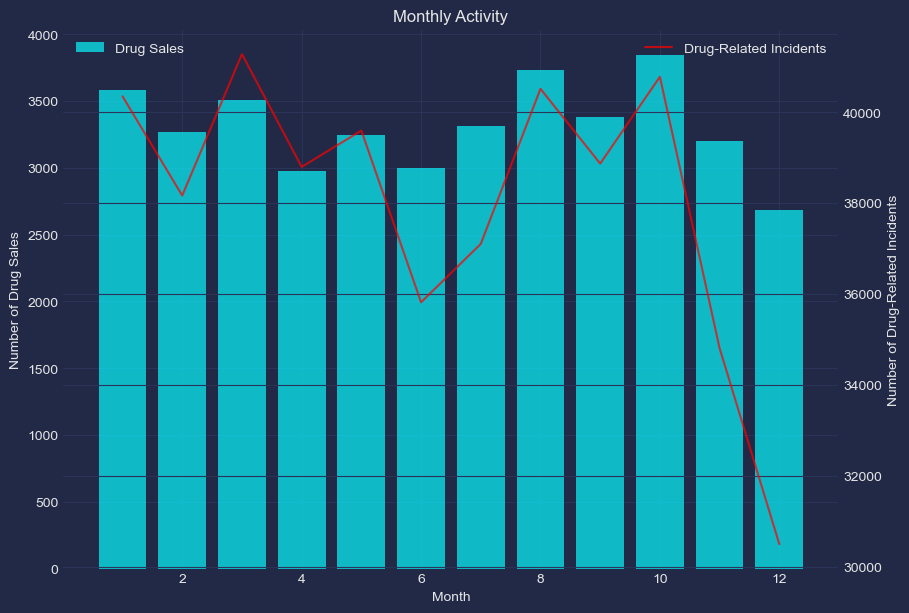

In [94]:
import mplcyberpunk
plt.style.use('cyberpunk')

fig, ax1 = plt.subplots(figsize=(10, 7))

monthly_drugs_sales = drugs_sales_df['cmplnt_fr_dt'].dt.month.value_counts().sort_index()

ax1.bar(drugs_related_df['cmplnt_fr_dt'].dt.month.value_counts().sort_index().index, monthly_drugs_sales, alpha=0.7)
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Drug Sales')
ax1.legend(['Drug Sales'], loc="upper left")

ax1.set_title('Monthly Activity')

ax2 = ax1.twinx()
monthly_drugs_related = drugs_related_df['cmplnt_fr_dt'].dt.month.value_counts().sort_index()
monthly_drugs_related.plot(kind='line', alpha=0.7, color='red')
ax2.set_ylabel('Number of Drug-Related Incidents')
ax2.legend(['Drug-Related Incidents'], loc="upper right")

plt.show()

Yearly:

We start by creating a new dataframe, narrowed strictly to Drug Sales records

/var/folders/wc/n17tc0jd6058m722n3d1wlc00000gn/T/ipykernel_93413/3829193451.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  drugs_sales_df['cmplnt_fr_tm'] = pd.to_datetime(drugs_sales_df['cmplnt_fr_tm'])
/var/folders/wc/n17tc0jd6058m722n3d1wlc00000gn/T/ipykernel_93413/3829193451.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  drugs_related_df['cmplnt_fr_tm'] = pd.to_datetime(drugs_related_df['cmplnt_fr_tm'])
/var/folders/wc/n17tc0jd6058m722n3d1wlc00000gn/T/ipykernel_93413/3829193451.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

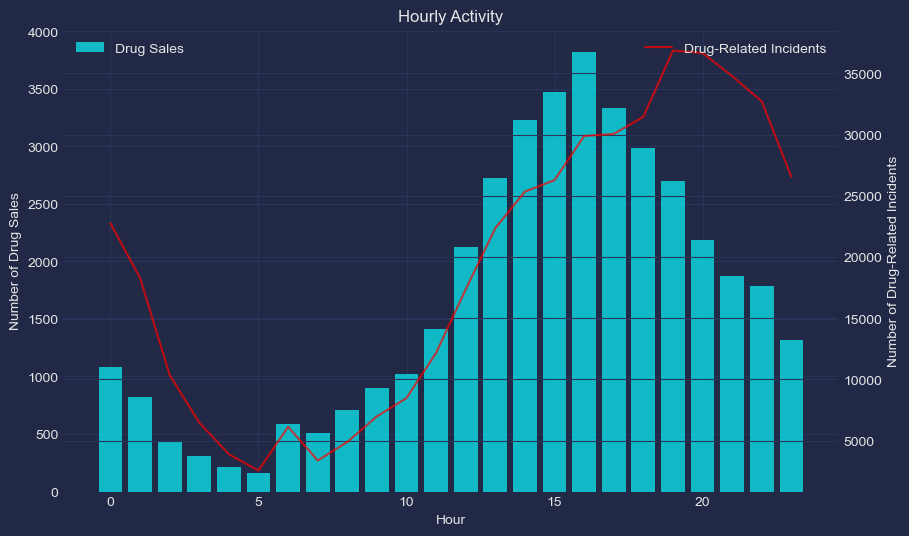

In [95]:
fig, ax = plt.subplots(figsize=(10, 6))

drugs_sales_df['cmplnt_fr_tm'] = pd.to_datetime(drugs_sales_df['cmplnt_fr_tm'])
hourly_activity_sales = drugs_sales_df['cmplnt_fr_tm'].dt.hour.value_counts().sort_index()
ax.bar(hourly_activity_sales.index, hourly_activity_sales, alpha=0.7)
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Drug Sales')
ax.set_title('Hourly Activity')
ax.legend(['Drug Sales'], loc="upper left")

ax2 = ax.twinx()
drugs_related_df['cmplnt_fr_tm'] = pd.to_datetime(drugs_related_df['cmplnt_fr_tm'])
hourly_activity_related = drugs_related_df['cmplnt_fr_tm'].dt.hour.value_counts().sort_index()
ax2.plot(hourly_activity_related.index, hourly_activity_related, alpha=0.7, color='red')
ax2.set_ylabel('Number of Drug-Related Incidents')
ax2.legend(['Drug-Related Incidents'], loc="upper right")

plt.show()

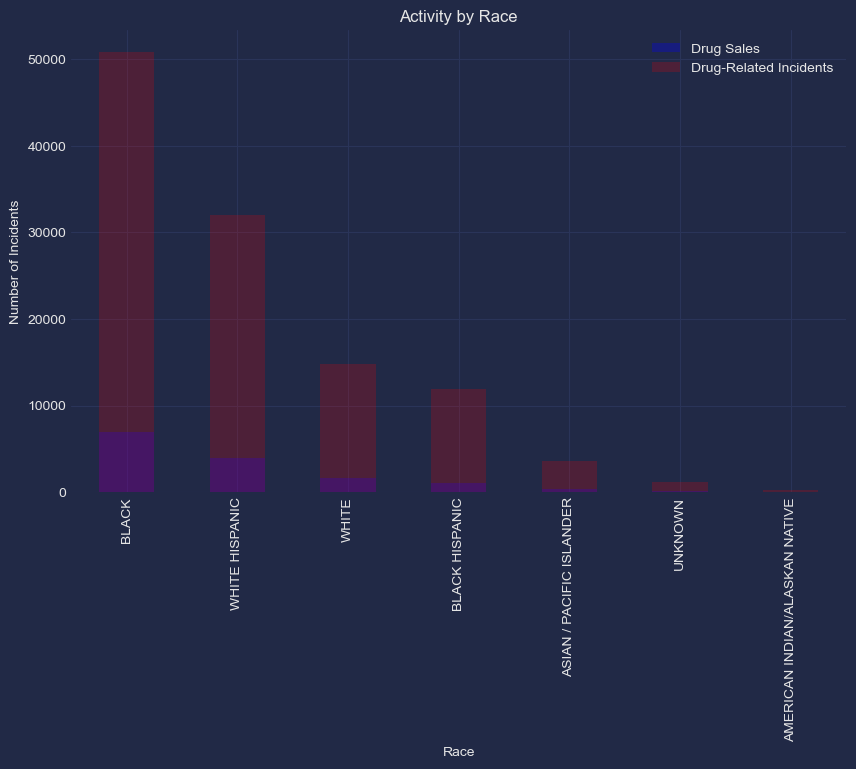

In [96]:
drugs_sales_df_filtered = drugs_sales_df[drugs_sales_df['susp_race'] != '(null)']
drugs_related_df_filtered = drugs_related_df[drugs_related_df['susp_race'] != '(null)']

plt.figure(figsize=(10, 6))
race_activity_sales = drugs_sales_df_filtered['susp_race'].value_counts()
race_activity_related = drugs_related_df_filtered['susp_race'].value_counts()

race_activity_sales.plot(kind='bar', alpha=0.3, color='blue')
race_activity_related.plot(kind='bar', alpha=0.2, color='red')

plt.xlabel('Race')
plt.ylabel('Number of Incidents')
plt.title('Activity by Race')
plt.legend(['Drug Sales', 'Drug-Related Incidents'])
plt.show()


In [97]:
query = {
    "limit": 84838,
    "name": "DOF: Summary of Neighborhood Sales by Neighborhood Citywide by Borough",
    "output_file": "data/geo_borough_prices.csv",
    "url": "https://data.cityofnewyork.us/resource/5ebm-myj7.csv",
    "filters": ""
}

url = query['url']
limit = query["limit"]
filters = query["filters"]
print("Downloading filtered dataset called", query["name"])
print("Filters:", filters)
offset = 0
geo_borough_prices_df = pd.DataFrame()

while True:
    current_url = f"{url}?{filters}&$limit={limit}&$offset={offset}"
    print(f"Current URL: {current_url}") 
    
    response = requests.get(current_url, auth=HTTPBasicAuth(api_key, api_secret))

    if response.status_code == 200:
        print(f"Response Status Code: {response.status_code}")
        csv_data = StringIO(response.text)
        df_temp = pd.read_csv(csv_data)

        if not df_temp.empty:
            print(f"Retrieved {df_temp.shape[0]} records") 
            geo_borough_prices_df = pd.concat([geo_borough_prices_df, df_temp])
            offset += limit
        else:
            print("No more data to retrieve.")
            break
    else:
        print(f"Error: {response.status_code}")
        print(response.text) 
        raise Exception(f"Failed to retrieve data. Status code: {response.status_code}", response.json())

geo_borough_prices_df.to_csv(query["output_file"], index=False)
print("Saved to file", query["output_file"])
print("Final DataFrame Shape:", geo_borough_prices_df.shape)  # Print the shape of the final DataFrame

Filters: 
Current URL: https://data.cityofnewyork.us/resource/5ebm-myj7.csv?&$limit=84838&$offset=0
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   4.8s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=200; total time=  15.0s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   6.5s
Response Status Code: 200
Retrieved 7788 records
Current URL: https://data.cityofnewyork.us/resource/5ebm-myj7.csv?&$limit=84838&$offset=84838
Response Status Code: 200
No more data to retrieve.
Saved to file data/geo_borough_prices.csv
Final DataFrame Shape: (7788, 9)


In [98]:
drugs_df = df[df['pd_desc'].str.contains('Sale', case=False, na=False)]

Rename drugs_df boro_nm column to correspond to boroughs "boroguh" columns for later merge.

In [99]:
drugs_df = drugs_df.rename(columns={'boro_nm': 'borough'})
drugs_df = drugs_df[['cmplnt_fr_dt', 'cmplnt_fr_tm', 'borough']]
drugs_df = drugs_df.dropna()

drugs_df['year'] = pd.to_datetime(drugs_df['cmplnt_fr_dt']).dt.year.astype(int)

drugs_df.head()

,cmplnt_fr_dt,cmplnt_fr_tm,borough,year
10,2023-12-30,11:48:00,MANHATTAN,2023
16,2023-12-30,20:00:00,BRONX,2023
22,2023-12-24,18:38:00,QUEENS,2023
34,2023-12-29,15:25:00,STATEN ISLAND,2023
35,2023-12-29,05:38:00,BRONX,2023


In [100]:
boro_df = pd.read_csv("data/geo_borough_prices.csv")
boro_df.head()

,borough,neighborhood,type_of_home,number_of_sales,lowest_sale_price,average_sale_price,median_sale_price,highest_sale_price,year
0,MANHATTAN,ALPHABET CITY,01 ONE FAMILY HOMES,1,593362,593362,593362,593362.0,2010
1,MANHATTAN,ALPHABET CITY,02 TWO FAMILY HOMES,1,1320000,1320000,1320000,1320000.0,2010
2,MANHATTAN,ALPHABET CITY,03 THREE FAMILY HOMES,1,900000,900000,900000,900000.0,2010
3,MANHATTAN,CHELSEA,01 ONE FAMILY HOMES,2,500000,2875000,2875000,5250000.0,2010
4,MANHATTAN,CHELSEA,02 TWO FAMILY HOMES,2,1306213,2603107,2603107,3900000.0,2010


Adding year collumn for a merge with another dataset:

In [101]:
boro_df = boro_df[['borough', 'median_sale_price', 'year']]

Get borough prices - avg from median of all housing types for borough


In [102]:
boro_df.groupby(['borough', 'year'])['median_sale_price'].median()
average_df = boro_df.groupby(['borough', 'year']).mean().reset_index()
average_df = average_df.rename(columns={'median_sale_price': 'avg_price'})
average_df.to_csv("data/average_prices.csv", index=False)

Merge Borough Average Dataframe and Drugs Sales Dataframe

In [103]:
merged_df = pd.merge(average_df, drugs_df, on=['borough', 'year'])
print(merged_df.head())
print(merged_df.shape)

  borough  year      avg_price cmplnt_fr_dt cmplnt_fr_tm
0   BRONX  2010  415482.833333   2010-11-17     22:15:00
1   BRONX  2010  415482.833333   2010-12-31     22:41:00
2   BRONX  2010  415482.833333   2010-12-30     09:30:00
3   BRONX  2010  415482.833333   2010-12-30     09:40:00
4   BRONX  2010  415482.833333   2010-12-29     19:40:00
(23398, 5)


Create visualization for each borough with average prices and Drugs sales overall.

We group them by Year and Average price, and loop over each borough to create a plot.

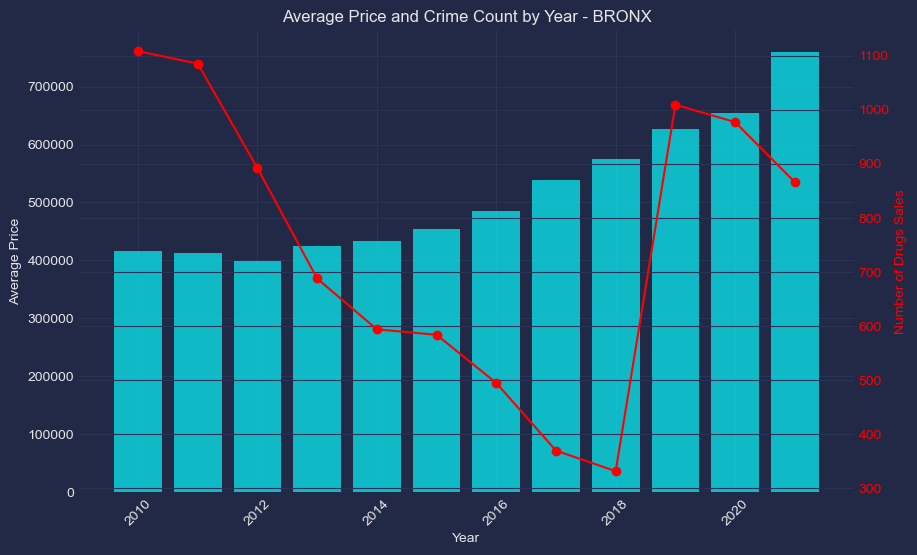

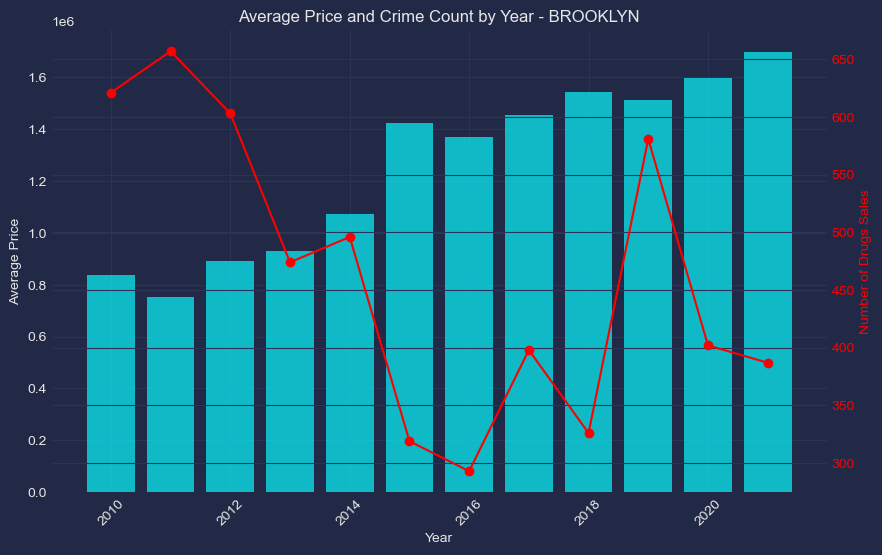

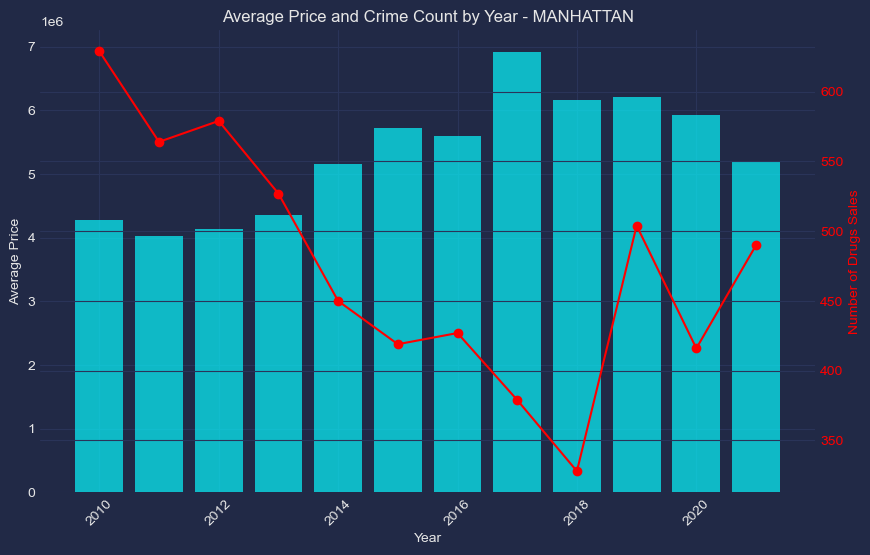

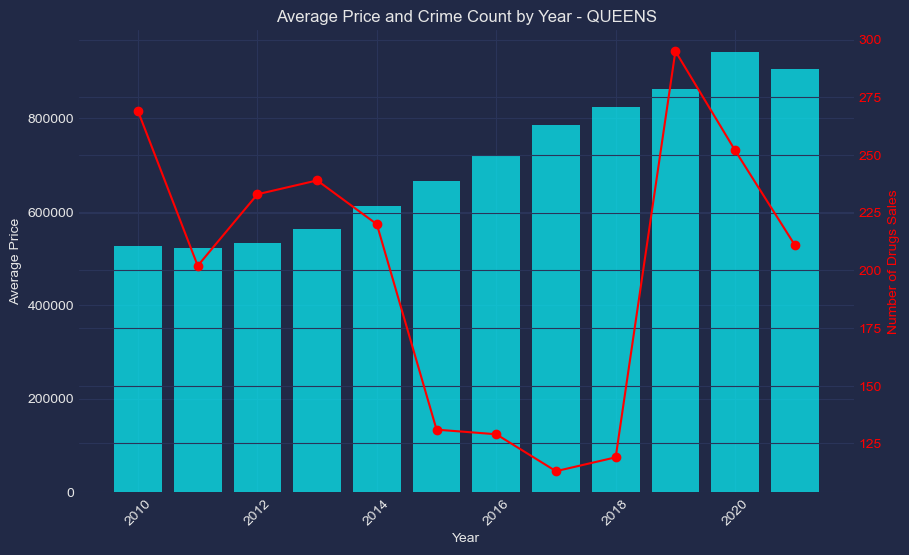

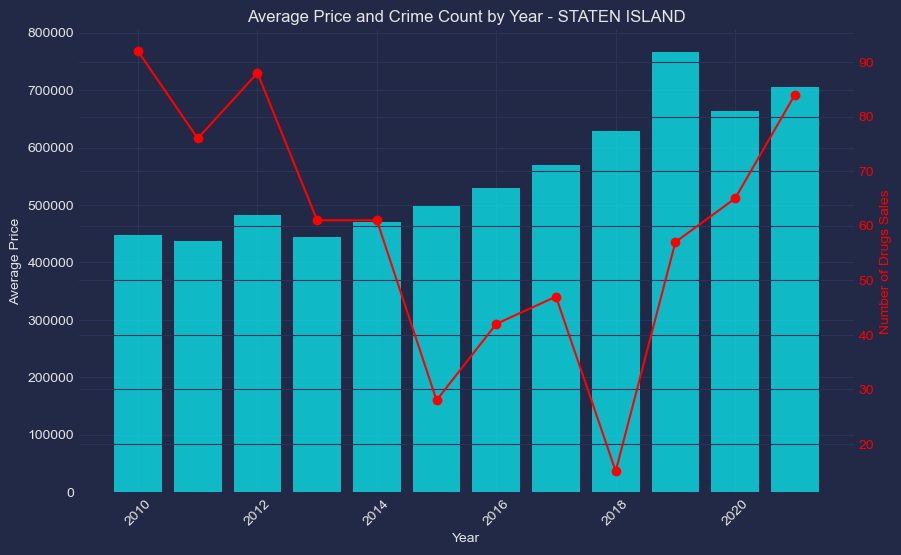

In [104]:
plt.style.use('cyberpunk')
boroughs = merged_df['borough'].unique()

for borough in boroughs:
    borough_data = merged_df[merged_df['borough'] == borough]

    grouped_data = borough_data.groupby(['year', 'avg_price']).size().reset_index(name='crime_count')
    
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.bar(grouped_data['year'], grouped_data['avg_price'], alpha=0.7)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Average Price')
    ax1.set_title(f'Average Price and Crime Count by Year - {borough}')
    ax1.tick_params(axis='x', rotation=45)
    
    ax2 = ax1.twinx()
    ax2.plot(grouped_data['year'], grouped_data['crime_count'], color='red', marker='o')
    ax2.set_ylabel('Number of Drugs Sales', color='red')
    ax2.tick_params(axis='y', colors='red')
    
    plt.show()

In [105]:
limit = 84838
offset = 0

filters = quote("""
                $where=pd_desc like '%CONTROLLED%SUBSTANCE%SALE%'
                """.strip(), safe=':/?&=')
print("Filters:", filters)

df_sale = pd.DataFrame()
while True:
    url = f"""
    https://data.cityofnewyork.us/resource/qgea-i56i.csv?{filters}&$limit={limit}&$offset={offset}
    """.strip()
    response = requests.get(url, auth=HTTPBasicAuth(api_key, api_secret))

    if response.status_code == 200:
        csv_data = StringIO(response.text)
        df_temp = pd.read_csv(csv_data)

        # If df is not empty, append the new data
        if not df_temp.empty:
            print(f"Retrieved {offset + limit} records")
            df_sale = pd.concat([df, df_temp])
            offset += limit
        else:
            break
    else:
        raise Exception(f"Failed to retrieve data. Status code: {response.status_code}", response.json())
    
# Save to file
df_sale.to_csv(output_file, index=False)
print("Saved to file", output_file)

Filters: %24where=pd_desc%20like%20%27%25CONTROLLED%25SUBSTANCE%25SALE%25%27
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   9.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=  10.6s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=  10.7s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   5.0s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=200; total time=  15.6s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=  10.6s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   9.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   5.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   8.5s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   9.2s
Retrieved 84838 records
Saved to file data/full_drug_crime.csv


In [106]:
df_sale = df[df['pd_desc'].str.contains('Sale', case=False, na=False)]

In [107]:
print("Cols", df.columns)
df.dropna(subset=['cmplnt_fr_dt'], inplace=True)
df.head()

Cols Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt',
       'cmplnt_to_tm', 'addr_pct_cd', 'rpt_dt', 'ky_cd', 'ofns_desc', 'pd_cd',
       'pd_desc', 'crm_atpt_cptd_cd', 'law_cat_cd', 'boro_nm',
       'loc_of_occur_desc', 'prem_typ_desc', 'juris_desc', 'jurisdiction_code',
       'parks_nm', 'hadevelopt', 'housing_psa', 'x_coord_cd', 'y_coord_cd',
       'susp_age_group', 'susp_race', 'susp_sex', 'transit_district',
       'latitude', 'longitude', 'lat_lon', 'patrol_boro', 'station_name',
       'vic_age_group', 'vic_race', 'vic_sex', 'year'],
      dtype='object')


,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,...,transit_district,latitude,longitude,lat_lon,patrol_boro,station_name,vic_age_group,vic_race,vic_sex,year
0,279757864,2023-12-31,18:00:00,2023-12-31T00:00:00.000,18:00:00,81.0,2023-12-31T00:00:00.000,117,DANGEROUS DRUGS,503,...,NaN,40.678956,-73.937054,"(40.678956, -73.937054)",PATROL BORO BKLYN NORTH,NaN,UNKNOWN,UNKNOWN,E,2023
1,279763337,2023-12-31,11:50:00,2024-01-01T00:00:00.000,00:03:00,62.0,2023-12-31T00:00:00.000,235,DANGEROUS DRUGS,511,...,NaN,40.605138,-74.017283,"(40.605138111976096, -74.01728277170662)",PATROL BORO BKLYN SOUTH,NaN,UNKNOWN,UNKNOWN,E,2023
2,279734621,2023-12-31,01:01:00,2023-12-31T00:00:00.000,01:07:00,84.0,2023-12-31T00:00:00.000,235,DANGEROUS DRUGS,511,...,32.0,40.683765,-73.978760,"(40.68376454457041, -73.97875956361523)",PATROL BORO BKLYN NORTH,PACIFIC STREET,UNKNOWN,UNKNOWN,E,2023
3,279761717,2023-12-31,20:45:00,2023-12-31T00:00:00.000,20:48:00,103.0,2023-12-31T00:00:00.000,235,DANGEROUS DRUGS,511,...,NaN,40.702474,-73.799921,"(40.70247387178277, -73.79992086969553)",PATROL BORO QUEENS SOUTH,NaN,UNKNOWN,UNKNOWN,E,2023
4,279738841,2023-12-31,00:00:00,2023-12-31T00:00:00.000,00:27:00,103.0,2023-12-31T00:00:00.000,117,DANGEROUS DRUGS,503,...,NaN,40.707439,-73.792139,"(40.707439, -73.792139)",PATROL BORO QUEENS SOUTH,NaN,UNKNOWN,UNKNOWN,E,2023


Keep only columns used for visualization:

-cmplnt_fr_dt - when complaiment was made (used for monthly visualization)

-cmplnt_fr_tm - when complaiment was made (used for hourly visualization)

-year - year of complaiment (used for yearly visualization)

-susp_race - info about sus race

-lat and lon - info for visualization on map of NY - change over years

In [108]:
df_sale = df_sale[['cmplnt_fr_dt', 'cmplnt_fr_tm', 'latitude', 'longitude']]

In [109]:
import folium
from folium.plugins import HeatMapWithTime

df_sale['year_month'] = df_sale['cmplnt_fr_dt'].dt.to_period('M')

m = folium.Map(location=[df_sale['latitude'].mean(), df_sale['longitude'].mean()], zoom_start=10)
heatmap_data_by_year_month = []
for year_month, group in df_sale.groupby('year_month'):
    heatmap_data = [[row['latitude'], row['longitude']] for index, row in group.iterrows()]
    heatmap_data_by_year_month.append({'data': heatmap_data, 'index': year_month})
heatmap_data_by_year_month.sort(key=lambda x: x['index'])
heatmap_data = [d['data'] for d in heatmap_data_by_year_month]
index = [str(d['index']) for d in heatmap_data_by_year_month]

Empty Map generation:

In [110]:

HeatMapWithTime(heatmap_data, 
                auto_play=True,
                radius=25,
                max_opacity=0.4,
                gradient={0.1: 'blue', 0.5: 'lime', 1: 'red'},
                index=index,
                max_speed=30,
                min_speed=15,
               ).add_to(m)
m

## Part 3 Prediction Model

Few function which will help us to retrieve the data and validate it quickly.

In [128]:
def getJson(URL, APIKey, APISecret):
    response = requests.get(URL, auth=HTTPBasicAuth(APIKey, APISecret))
    if response.status_code != 200:
        print(f"Request failed with status code {response.status_code}")
        sys.exit(1)
    return response.json()


def getDataFrame(Json):
    df = pd.DataFrame(Json)
    columns_to_remove = ['cmplnt_num', 'addr_pct_cd', 'ky_cd', 'pd_cd', 'crm_atpt_cptd_cd', 'loc_of_occur_desc',
                         'juris_desc', 'jurisdiction_code', 'hadevelopt', 'housing_psa', 'x_coord_cd', 'y_coord_cd',
                         'lat_lon', 'patrol_boro', 'station_name', 'vic_age_group', 'vic_race', 'vic_sex',
                         ':@computed_region_efsh_h5xi', ':@computed_region_f5dn_yrer',
                         ':@computed_region_yeji_bk3q', ':@computed_region_92fq_4b7q',
                         ':@computed_region_sbqj_enih', 'transit_district']

    df.drop(columns=columns_to_remove, inplace=True, errors='ignore')
    return df


def saveToCSV(dataFrame):
    dataFrame.to_csv('full_crime_data.csv', index=False)


def printInfo(dataFrame):
    print(dataFrame.shape)

Data download and check:

In [127]:
APIKey = 'b6g8ahp9cur6ukfvc9ebax0tn'
APISecret = '4r06v9zy295iz4fujr2hfprjfotyx113uye1i55x8yddjgkin2'
URL = 'https://data.cityofnewyork.us/resource/qgea-i56i.json?$limit=200000'

Json = getJson(URL=URL, APIKey=APIKey, APISecret=APISecret)
dataFrame = getDataFrame(Json=Json)
saveToCSV(dataFrame)
printInfo(dataFrame)

(200000, 16)


Here is where our model comes in with a prediction.

We aim to optimize a GradientBoostingClassifier to predict whether a crime is a felony based on features like the hour, day of the week, suspect's age group, and race.

first, we import all the necessary libraries for data loading, preprocessing, and model building.

In [113]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler

Load the full data (not just drug criminal records anymore) from a CSV file into a Pandas DataFrame.

In [114]:
def loadFromCSV(pathName):
    return pd.read_csv(pathName)

df_all_crimes = loadFromCSV('full_crime_data.csv')
df_all_crimes.head(5)

,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,rpt_dt,ofns_desc,pd_desc,law_cat_cd,boro_nm,prem_typ_desc,parks_nm,susp_age_group,susp_race,susp_sex,latitude,longitude
0,2023-12-31T00:00:00.000,09:30:00,2023-12-31T00:00:00.000,09:41:00,2023-12-31T00:00:00.000,VEHICLE AND TRAFFIC LAWS,"TRAFFIC,UNCLASSIFIED MISDEMEAN",MISDEMEANOR,STATEN ISLAND,STREET,(null),(null),(null),(null),40.627527,-74.167378
1,2023-12-31T00:00:00.000,19:40:00,2023-12-31T00:00:00.000,19:43:00,2023-12-31T00:00:00.000,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,MISDEMEANOR,BRONX,RESIDENCE-HOUSE,(null),25-44,UNKNOWN,U,40.829516,-73.827583
2,2023-12-31T00:00:00.000,05:00:00,2023-12-31T00:00:00.000,05:10:00,2023-12-31T00:00:00.000,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",FELONY,BRONX,(null),(null),UNKNOWN,UNKNOWN,U,40.838160,-73.923233
3,2023-12-31T00:00:00.000,13:03:00,2023-12-31T00:00:00.000,13:06:00,2023-12-31T00:00:00.000,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",VIOLATION,BRONX,STREET,(null),25-44,BLACK,M,40.835827,-73.910554
4,2023-12-31T00:00:00.000,22:45:00,2023-12-31T00:00:00.000,23:00:00,2023-12-31T00:00:00.000,HARRASSMENT 2,"HARASSMENT,SUBD 1,CIVILIAN",VIOLATION,QUEENS,RESIDENCE-HOUSE,(null),65+,BLACK,M,40.679981,-73.776234


Quick inspect on the main dataframe

In [115]:
def inspect_dataframe(df):
    print("DataFrame Columns:", df.columns)
    print("DataFrame Info:")
    df.info()

inspect_dataframe(df_all_crimes)

DataFrame Columns: Index(['cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt', 'cmplnt_to_tm',
       'rpt_dt', 'ofns_desc', 'pd_desc', 'law_cat_cd', 'boro_nm',
       'prem_typ_desc', 'parks_nm', 'susp_age_group', 'susp_race', 'susp_sex',
       'latitude', 'longitude'],
      dtype='object')
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   cmplnt_fr_dt    200000 non-null  object 
 1   cmplnt_fr_tm    200000 non-null  object 
 2   cmplnt_to_dt    188281 non-null  object 
 3   cmplnt_to_tm    200000 non-null  object 
 4   rpt_dt          200000 non-null  object 
 5   ofns_desc       200000 non-null  object 
 6   pd_desc         200000 non-null  object 
 7   law_cat_cd      200000 non-null  object 
 8   boro_nm         200000 non-null  object 
 9   prem_typ_desc   200000 non-null  object 
 10  parks_nm        200000 non

We convert the 'cmplnt_fr_dt' and 'cmplnt_fr_tm' columns to datetime objects and extract relevant features.

In [116]:
df_all_crimes['cmplnt_fr_dt'] = pd.to_datetime(df_all_crimes['cmplnt_fr_dt'], errors='coerce')

df_all_crimes = df_all_crimes.dropna(subset=['cmplnt_fr_dt'])

df_all_crimes['cmplnt_fr_tm'] = pd.to_datetime(df_all_crimes['cmplnt_fr_tm'], format='%H:%M:%S', errors='coerce').dt.time
df_all_crimes['hour'] = df_all_crimes['cmplnt_fr_tm'].apply(lambda x: x.hour)

df_all_crimes['day_of_week'] = df_all_crimes['cmplnt_fr_dt'].dt.dayofweek

df_all_crimes = df_all_crimes.dropna()

Then we encode the suspect's age ('susp_age_group') and race ('susp_race') columns into numerical labels using LabelEncoder.

In [117]:
age_encoder = LabelEncoder()
race_encoder = LabelEncoder()

df_all_crimes['susp_age_group_encoded'] = age_encoder.fit_transform(df_all_crimes['susp_age_group'])
df_all_crimes['susp_race_encoded'] = race_encoder.fit_transform(df_all_crimes['susp_race'])

We define the feature matrix X and the target vector y

In [118]:
X = df_all_crimes[['hour', 'day_of_week', 'susp_age_group_encoded', 'susp_race_encoded']]
y = df_all_crimes['law_cat_cd'].apply(lambda x: 1 if x == 'FELONY' else 0)  # Binary target: 1 for felony, 0 for others

Spliting our data into training and testing sets

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize the features, by that we make sure that each feature contributes equally to our model's learning process.

In [120]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We train a GradientBoostingClassifier using GridSearchCV for hyperparameter tuning and evaluate its performance.

In [121]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

gb_model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

best_gb_model = grid_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted', zero_division=0)
recall_gb = recall_score(y_test, y_pred_gb, average='weighted', zero_division=0)
f1_gb = f1_score(y_test, y_pred_gb, average='weighted', zero_division=0)

print(f'GradientBoostingClassifier Accuracy: {accuracy_gb:.2f}')
print(f'GradientBoostingClassifier Precision: {precision_gb:.2f}')
print(f'GradientBoostingClassifier Recall: {recall_gb:.2f}')
print(f'GradientBoostingClassifier F1 Score: {f1_gb:.2f}')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters found: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Best cross-validation score: 0.6642123074914554
GradientBoostingClassifier Accuracy: 0.66
GradientBoostingClassifier Precision: 0.62
GradientBoostingClassifier Recall: 0.66
GradientBoostingClassifier F1 Score: 0.57


We initialize and train a logistic regression model to predict whether a crime is a felony (1) or not (0). After training, we make predictions on the test data and evaluate the model's performance using accuracy, precision, recall, and F1 score.

In [122]:
logistic_model = LogisticRegression(random_state=42, max_iter=10000)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted', zero_division=0)
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted', zero_division=0)
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted', zero_division=0)

print(f'LogisticRegression Accuracy: {accuracy_logistic:.2f}')
print(f'LogisticRegression Precision: {precision_logistic:.2f}')
print(f'LogisticRegression Recall: {recall_logistic:.2f}')
print(f'LogisticRegression F1 Score: {f1_logistic:.2f}')

LogisticRegression Accuracy: 0.66
LogisticRegression Precision: 0.44
LogisticRegression Recall: 0.66
LogisticRegression F1 Score: 0.53


The logistic regression model achieved an accuracy of 0.66, indicating it correctly classified 66% of the test instances. The precision and recall scores were 0.44 and 0.66, respectively, resulting in an F1 score of 0.53, which balances precision and recall.

We used two machine learning models, Gradient Boosting Classifier and Logistic Regression, to predict whether a crime is a felony based on various features in the full crime data. Here’s a simple summary of why we chose these models and how they performed:

Gradient Boosting Classifier (GBC):

Why we used it:

-GBC is a powerful ensemble method that combines multiple weak learners (usually decision trees) to create a strong predictive model. It's particularly good at handling complex datasets and capturing intricate patterns.

Advantages:

-This model tends to provide high accuracy and robustness, making it suitable for predicting felonies, which can be influenced by various factors.

Performance:

-After tuning the model's parameters using GridSearchCV, the GBC achieved the best cross-validation score of 0.66. This indicates a strong ability to generalize to new data.


Logistic Regression:

Why we used it:

-Logistic Regression is a simple yet effective model for binary classification tasks (like predicting felony vs. non-felony). It helps us understand the relationship between the features and the target variable.

Advantages:

-It’s easy to implement, interpret, and works well for linearly separable data. It’s also useful as a benchmark to compare with more complex models.

Performance: 

-Although simpler, Logistic Regression provided a decent baseline performance.